**Packages needed to be imported**

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models,callbacks
from PIL import Image,ImageOps
import matplotlib.pyplot as plt

**Loading the data**

In [3]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_images.shape
test_images.shape

(10000, 28, 28)

**visually see the data**

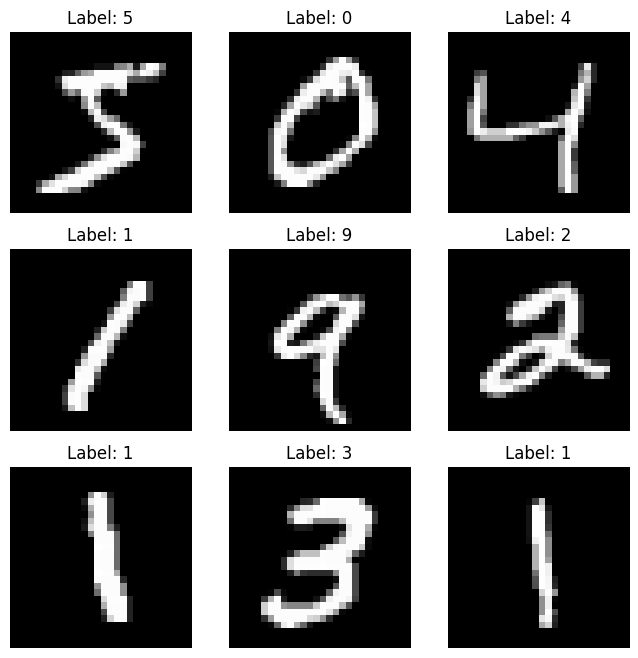

In [15]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
  plt.title(f'Label: {train_labels[i]}')
  plt.axis('off')

**Normalize the images**

In [16]:
train_images.dtype

dtype('uint8')

In [17]:
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

**reshaping it for including channel dimension**

In [18]:
train_images[0].shape

(28, 28)

In [26]:
train_images=train_images.reshape((-1,28,28,1))
test_images=test_images.reshape((-1,28,28,1))

In [27]:
train_images[0].shape

(28, 28, 1)

**One hot encoding for labels**

In [28]:
train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

**Data agumentation**

In [31]:
data_agumentation=tf.keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.10)
])

**Model Building**

In [45]:
def create_model():
  model=models.Sequential([
      layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
      layers.BatchNormalization(),  #Normalization
      layers.MaxPool2D((2,2)),

      layers.Conv2D(64,(3,3),activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(128,(3,3),activation='relu'),
      layers.BatchNormalization(),

      layers.Flatten(),

      layers.Dense(128,activation='relu'),
      layers.Dropout(0.50),
      layers.Dense(10,activation='softmax')
  ])
  return model

**Creating instance for model**

In [46]:
model=create_model()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Implementing early stopping and reduce the learning rate**

In [47]:
early_stopping=callbacks.EarlyStopping(patience=5,restore_best_weights=True)
reduce_lr=callbacks.ReduceLROnPlateau(patience=3,factor=0.20)

**Training the model**

In [49]:
history=model.fit(train_images,train_labels,epochs=30,validation_split=0.20,callbacks=[early_stopping,reduce_lr])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.9017 - loss: 0.3272 - val_accuracy: 0.9794 - val_loss: 0.0724 - learning_rate: 0.0010
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9771 - loss: 0.0794 - val_accuracy: 0.9861 - val_loss: 0.0508 - learning_rate: 0.0010
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9843 - loss: 0.0593 - val_accuracy: 0.9877 - val_loss: 0.0506 - learning_rate: 0.0010
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 49ms/step - accuracy: 0.9876 - loss: 0.0443 - val_accuracy: 0.9894 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9898 - loss: 0.0352 - val_accuracy: 0.9902 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9881 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accura

In [50]:
loss,accuracy=model.evaluate(test_images,test_labels)
print(f'Loss {loss}')
print(f'Accuracy {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9856 - loss: 0.0425
Loss 0.03585869446396828
Accuracy 0.988099992275238


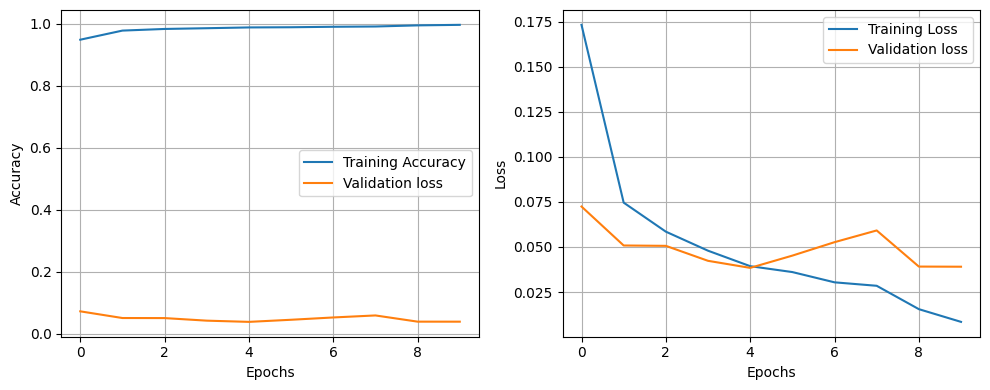

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()

**Saving the model**

In [56]:
model.save('mnist.keras')
print('model saved')

model saved


**Prediction**

In [63]:
image_path=r"/content/4img.jpg"
img=Image.open(image_path).convert('L') #Converting image to gray scale
img=ImageOps.invert(img) #0-255
img=img.resize((28,28))
img_arr=np.array(img)
img_arr=img_arr.astype('float32')/255
img_arr=img_arr.reshape((-1,28,28,1))
prediction=model.predict(img_arr)
prediction_class=np.argmax(prediction)
confidence=np.max(prediction)
img=img.resize((28,28))
img_arr=np.array(img)
img_arr=img_arr.astype('float32')/255
img_arr=img_arr.reshape((-1,28,28,1))
prediction=model.predict(img_arr)
prediction_class=np.argmax(prediction)
confidence=np.max(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [65]:
print(prediction_class,confidence)

1 0.9999988
